In [1]:
from numpy.linalg import svd
import numpy as np
from skimage import data
from skimage.color import rgb2gray
from skimage import img_as_float

In [2]:
def reconstruct_svd(image,k):
    U,S,V = svd(image, full_matrices=False)
    reconst_matrix = np.dot(U[:,:k], np.dot(np.diag(S[:k]), V[:k,:]))
    
    return reconst_matrix, S

In [3]:
import cv2
from PIL import Image
import pandas as pd

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt

In [5]:
%pwd

u'/data1/dbashir/courses/deeplearning1/nbs'

In [6]:
orig_img = Image.open('SVD_Img.jpg')

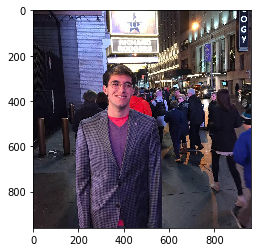

In [7]:
plt.imshow(orig_img)

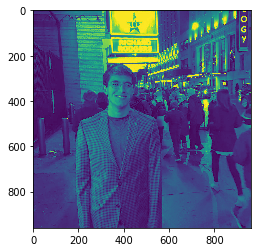

In [8]:
img = np.array(orig_img)
#image = img / 255
plt.imshow(img)

image_red = img[:,:,0]
image_green = img[:,:,1]
image_blue = img[:,:,2]

plt.imshow(image_green)

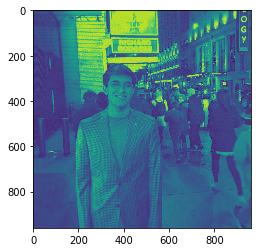

In [9]:
k = 128

reconst_img_red, s = reconstruct_svd(image_red, k)

reconst_img_green, s = reconstruct_svd(image_green, k)

reconst_img_blue, s = reconstruct_svd(image_blue, k)
plt.imshow(reconst_img_blue)

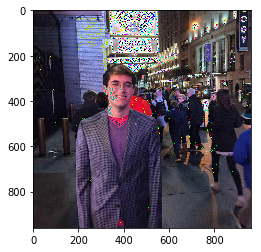

In [10]:
image_reconstructed = img #initialize
image_reconstructed[:,:,0] = reconst_img_red
image_reconstructed[:,:,1] = reconst_img_green
image_reconstructed[:,:,2] = reconst_img_blue
plt.imshow(image_reconstructed)

In [12]:
import os
current_dir = os.getcwd()

In [13]:
imageDir = os.path.join(current_dir, "svd_image.jpg")
cv2.imwrite(imageDir, image_reconstructed)

True